In [18]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#import data and create data frame
df = pd.read_csv("Supermarket_Customers_data_v2.csv", delimiter=';')
df['sex_factor'] = pd.factorize(df.Sex)[0]

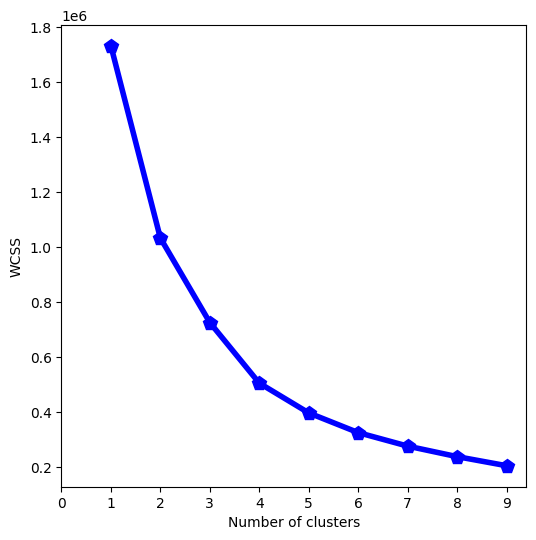

In [20]:
#Elbow method for identifying the optimal k for the algorithm
X = df.iloc[:,[3,4]].values
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (6,6))
plt.plot(range(1,10),WCSS, linewidth=4, markersize=10,marker='p',color = 'blue')
plt.xticks(np.arange(10))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
#Clusters plotted: Annual Income against Spending Score
X = df.iloc[:, [3,4]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)

(1082,)
int32


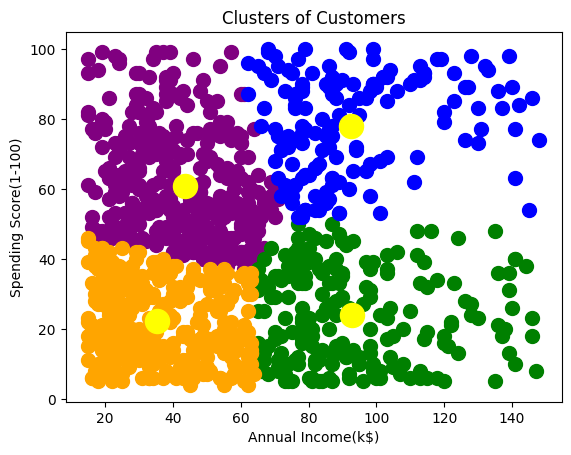

In [8]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='orange', label ='Cluster 4')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [9]:
#Clusters plotted: Age against Spending Scoree
X = df.iloc[:, [2,4]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)

(1082,)
int32


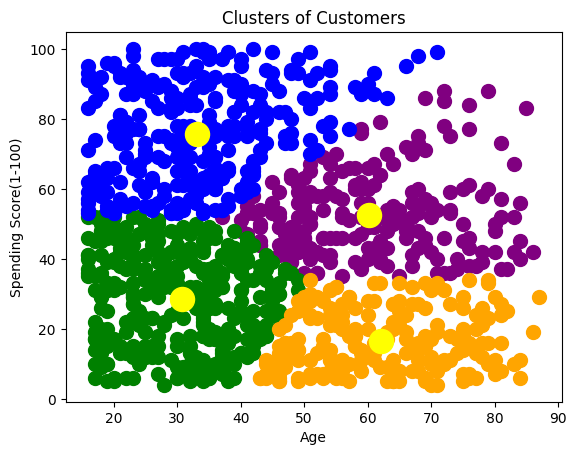

In [10]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='orange', label ='Cluster 4')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()


In [11]:
#Clusters plotted: Age against Annual Income

X = df.iloc[:, [2,3]].values
X[0:4]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)

(1082,)
int32


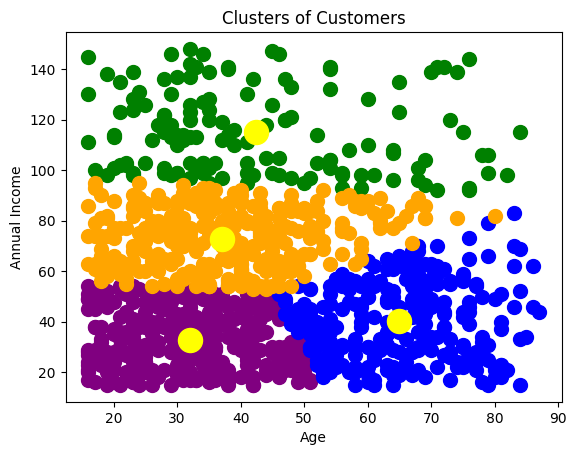

In [12]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='orange', label ='Cluster 4')
#plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [13]:
#Clusters plotted: Age against Annual Income
X = df.iloc[:, [5,4]].values
X[0:5]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)

(1082,)
int32


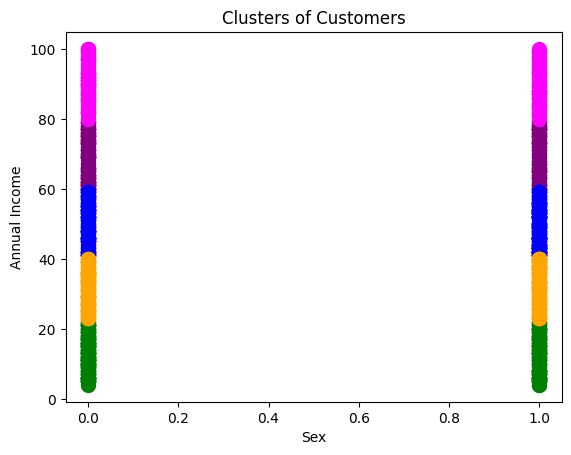

In [14]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='purple', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='blue', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='orange', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Sex')
plt.ylabel('Annual Income')
plt.show()